In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
uvp5_data = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/ecotaxa_export__TSV_17905_20250826_1223.tsv", sep="\t")
crop_df = pd.DataFrame(uvp5_data)

UVP5_CTD_37 = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_037.tsv", sep="\t", encoding="latin1")
UVP5_CTD_37['profile'] = 'UVP5_M181_CTD-37'

UVP5_CTD_50 = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_050.tsv", sep='\t', encoding="latin1")
UVP5_CTD_50['profile'] = 'UVP_M181_CTD-50'

UVP5_CTD_60 = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_060.tsv", sep='\t', encoding="latin1")
UVP5_CTD_60['profile'] = 'UVP5_M181_CTD-60'

UVP5_CTD_75 = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_075.tsv", sep='\t', encoding="latin1")
UVP5_CTD_75['profile'] = 'UVP5_M181_CTD-75'

UVP5_CTD_81 = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_081.tsv", sep='\t', encoding="latin1")
UVP5_CTD_81['profile'] = 'UVP5_M181_CTD-81'


# Create profile column for crop_df by transforming sample_id
# Remove first 2 characters, add CTD- before last 3 characters, convert to uppercase
crop_df['profile'] = crop_df['sample_id'].apply(lambda x: 
    (x[2:-3] + 'CTD-' + x[-3:]).upper() if len(x) >= 5 else x.upper()
)


print(f"\nUnique profiles in filtered crop_df: {sorted(crop_df['profile'].unique())}")

# Combine Calanoida and Copepoda into one category
crop_df['object_annotation_category'] = crop_df['object_annotation_category'].replace(
    {'Calanoida': 'Copepoda_total', 'Copepoda<Maxillopoda': 'Copepoda_total', 'puff': 'Trichodesmium'}
)

# Filter for specific object annotation categories
categories_to_keep = ["Appendicularia", "Thaliacea", "Cnidaria<Metazoa", "Copepoda_total", "Rhizaria", "Trichodesmium"]
crop_df_filtered = crop_df[crop_df['object_annotation_category'].isin(categories_to_keep)]
crop_df = crop_df_filtered
crop_df['object_annotation_category'].to_csv('crop_df.csv')


# Add biovolume column to crop_df using ESD values
# For UVP5 data: ESD is in pixels, so convert to micrometers first (multiply by 92 μm/pixel)
# Then convert to mm and calculate biovolume: Biovolume = (π/6) * ESD³
crop_df['esd_micrometers'] = crop_df['object_esd'] * 92  # Convert pixels to micrometers
crop_df['esd_mm'] = crop_df['esd_micrometers'] / 1000  # Convert micrometers to millimeters
crop_df['biovolume_mm3'] = (np.pi / 6) * (crop_df['esd_mm'] ** 3)

print("=== BIOVOLUME COLUMN ADDED TO CROP_DF (UVP5 DATA) ===")
print(f"ESD conversion: pixels -> micrometers -> millimeters")
print(f"New crop_df shape: {crop_df.shape}")
print(f"ESD in pixels statistics:")
print(crop_df['object_esd'].describe())
print(f"ESD in micrometers statistics:")
print(crop_df['esd_micrometers'].describe())
print(f"ESD in millimeters statistics:")
print(crop_df['esd_mm'].describe())
print(f"Biovolume (mm³) statistics:")
print(crop_df['biovolume_mm3'].describe())
print(f"\nColumns in crop_df: {crop_df.columns.tolist()}")

# Check for any NaN values in biovolume calculation
nan_count = crop_df['biovolume_mm3'].isna().sum()
if nan_count > 0:
    print(f"\nWarning: {nan_count} NaN values found in biovolume calculation")
    print("Checking object_esd for NaN values:")
    esd_nan_count = crop_df['object_esd'].isna().sum()
    print(f"NaN values in object_esd: {esd_nan_count}")




Unique profiles in filtered crop_df: ['M181_CTD-037', 'M181_CTD-050', 'M181_CTD-060', 'M181_CTD-075', 'M181_CTD-081']
=== BIOVOLUME COLUMN ADDED TO CROP_DF (UVP5 DATA) ===
ESD conversion: pixels -> micrometers -> millimeters
New crop_df shape: (5190, 152)
ESD in pixels statistics:
count    5190.000000
mean       12.984539
std         5.149271
min        10.155413
25%        10.823033
50%        11.507255
75%        13.013103
max       143.472868
Name: object_esd, dtype: float64
ESD in micrometers statistics:
count     5190.000000
mean      1194.577581
std        473.732955
min        934.297950
25%        995.719014
50%       1058.667440
75%       1197.205511
max      13199.503814
Name: esd_micrometers, dtype: float64
ESD in millimeters statistics:
count    5190.000000
mean        1.194578
std         0.473733
min         0.934298
25%         0.995719
50%         1.058667
75%         1.197206
max        13.199504
Name: esd_mm, dtype: float64
Biovolume (mm³) statistics:
count    5190.0

In [3]:
print(crop_df["object_annotation_category"].unique())

['Rhizaria' 'Copepoda_total' 'Trichodesmium' 'Cnidaria<Metazoa'
 'Appendicularia']


In [4]:
# Create filtered datasets with only relevant columns and rename with _M181 suffix
relevant_columns = ['profile', 'Depth [m]', 'Sampled volume [L]', 'yyyy-mm-dd hh:mm']

print("=== CREATING FILTERED M181 DATASETS ===\n")

# Check which columns exist in the datasets and create filtered versions
datasets = {
    'UVP5_CTD_37': UVP5_CTD_37,
    'UVP5_CTD_50': UVP5_CTD_50, 
    'UVP5_CTD_60': UVP5_CTD_60,
    'UVP5_CTD_75': UVP5_CTD_75,
    'UVP5_CTD_81': UVP5_CTD_81
}

# Create the new filtered datasets
UVP5_M181_CTD_37 = None
UVP5_M181_CTD_50 = None
UVP5_M181_CTD_60 = None
UVP5_M181_CTD_75 = None
UVP5_M181_CTD_81 = None

filtered_datasets = {}

for name, dataset in datasets.items():
    print(f"Processing {name}...")
    print(f"Available columns: {dataset.columns.tolist()}")
    
    # Check which relevant columns exist in this dataset
    existing_columns = [col for col in relevant_columns if col in dataset.columns]
    missing_columns = [col for col in relevant_columns if col not in dataset.columns]
    
    if missing_columns:
        print(f"Missing columns in {name}: {missing_columns}")
    
    if existing_columns:
        # Create filtered dataset with existing relevant columns
        filtered_name = name.replace('UVP5_CTD', 'UVP5_M181_CTD')
        filtered_dataset = dataset[existing_columns].copy()
        
        # Store in dictionary and create individual variables
        filtered_datasets[filtered_name] = filtered_dataset
        
        if name == 'UVP5_CTD_37':
            UVP5_M181_CTD_37 = filtered_dataset
        elif name == 'UVP5_CTD_50':
            UVP5_M181_CTD_50 = filtered_dataset
        elif name == 'UVP5_CTD_60':
            UVP5_M181_CTD_60 = filtered_dataset
        elif name == 'UVP5_CTD_75':
            UVP5_M181_CTD_75 = filtered_dataset
        elif name == 'UVP5_CTD_81':
            UVP5_M181_CTD_81 = filtered_dataset
            
        print(f"Created {filtered_name} with shape: {filtered_dataset.shape}")
        print(f"Columns: {filtered_dataset.columns.tolist()}")
        print(f"First few rows:")
        print(filtered_dataset.head(3))
    else:
        print(f"No relevant columns found in {name}")
    
    print("-" * 50)

print(f"\n=== SUMMARY ===")
print(f"Created {len(filtered_datasets)} filtered M181 datasets:")
for name, dataset in filtered_datasets.items():
    print(f"{name}: {dataset.shape}")

# Combine all filtered datasets if needed
if filtered_datasets:
    volume_M181_df = pd.concat(filtered_datasets.values(), ignore_index=True)
    print(f"\nCombined volume_M181_df shape: {volume_M181_df.shape}")
    print(f"Profiles in combined dataset: {volume_M181_df['profile'].value_counts()}")

=== CREATING FILTERED M181 DATASETS ===

Processing UVP5_CTD_37...
Available columns: ['Profile', 'Rawfilename', 'yyyy-mm-dd hh:mm', 'Depth [m]', 'Sampled volume [L]', 'LPM (1-1.26 µm) [# l-1]', 'LPM (1.26-1.59 µm) [# l-1]', 'LPM (1.59-2 µm) [# l-1]', 'LPM (2-2.52 µm) [# l-1]', 'LPM (2.52-3.17 µm) [# l-1]', 'LPM (3.17-4 µm) [# l-1]', 'LPM (4-5.04 µm) [# l-1]', 'LPM (5.04-6.35 µm) [# l-1]', 'LPM (6.35-8 µm) [# l-1]', 'LPM (8-10.1 µm) [# l-1]', 'LPM (10.1-12.7 µm) [# l-1]', 'LPM (12.7-16 µm) [# l-1]', 'LPM (16-20.2 µm) [# l-1]', 'LPM (20.2-25.4 µm) [# l-1]', 'LPM (25.4-32 µm) [# l-1]', 'LPM (32-40.3 µm) [# l-1]', 'LPM (40.3-50.8 µm) [# l-1]', 'LPM (50.8-64 µm) [# l-1]', 'LPM (64-80.6 µm) [# l-1]', 'LPM (80.6-102 µm) [# l-1]', 'LPM (102-128 µm) [# l-1]', 'LPM (128-161 µm) [# l-1]', 'LPM (161-203 µm) [# l-1]', 'LPM (203-256 µm) [# l-1]', 'LPM (256-323 µm) [# l-1]', 'LPM (323-406 µm) [# l-1]', 'LPM (406-512 µm) [# l-1]', 'LPM (512-645 µm) [# l-1]', 'LPM (645-813 µm) [# l-1]', 'LPM (0.813-1.

In [5]:
# Add depth_bin column to the filtered M181 datasets
print("=== ADDING DEPTH_BIN COLUMNS ===\n")

def create_depth_bin(depth_avg):
    """Convert depth average to depth interval string"""
    if pd.isna(depth_avg):
        return None
    
    # Calculate the start of the 5m interval
    interval_start = int(depth_avg - 2.5)
    interval_end = interval_start + 5
    
    return f"{interval_start}-{interval_end}m"

# Add depth_bin column to each filtered dataset
datasets_with_depth = {
    'UVP5_M181_CTD_37': UVP5_M181_CTD_37,
    'UVP5_M181_CTD_50': UVP5_M181_CTD_50,
    'UVP5_M181_CTD_60': UVP5_M181_CTD_60,
    'UVP5_M181_CTD_75': UVP5_M181_CTD_75,
    'UVP5_M181_CTD_81': UVP5_M181_CTD_81
}

for name, dataset in datasets_with_depth.items():
    if dataset is not None and 'Depth [m]' in dataset.columns:
        dataset['depth_bin'] = dataset['Depth [m]'].apply(create_depth_bin)
        
        print(f"Added depth_bin to {name}")
        print(f"Sample data:")
        sample_data = dataset[['Depth [m]', 'depth_bin']].head(10)
        print(sample_data)
        print(f"Unique depth bins: {sorted(dataset['depth_bin'].dropna().unique())}")
        print("-" * 50)
    else:
        print(f"Skipping {name} - dataset is None or missing 'Depth [m]' column")

# Also add to the combined dataset if it exists
if 'volume_M181_df' in locals() and 'Depth [m]' in volume_M181_df.columns:
    volume_M181_df['depth_bin'] = volume_M181_df['Depth [m]'].apply(create_depth_bin)
    
    print("Added depth_bin to combined volume_M181_df")
    print(f"Combined dataset shape: {volume_M181_df.shape}")
    print(f"Sample data:")
    sample_combined = volume_M181_df[['profile', 'Depth [m]', 'depth_bin']].head(10)
    print(sample_combined)
    
    print(f"\nDepth bins by profile:")
    for profile in sorted(volume_M181_df['profile'].unique()):
        profile_bins = volume_M181_df[volume_M181_df['profile'] == profile]['depth_bin'].unique()
        print(f"{profile}: {len(profile_bins)} bins - {sorted(profile_bins)}")

print(f"\n=== DEPTH_BIN COLUMN ADDED SUCCESSFULLY ===")

=== ADDING DEPTH_BIN COLUMNS ===

Added depth_bin to UVP5_M181_CTD_37
Sample data:
   Depth [m] depth_bin
0        2.5      0-5m
1        7.5     5-10m
2       12.5    10-15m
3       17.5    15-20m
4       22.5    20-25m
5       27.5    25-30m
6       32.5    30-35m
7       37.5    35-40m
8       42.5    40-45m
9       47.5    45-50m
Unique depth bins: ['0-5m', '10-15m', '100-105m', '1000-1005m', '1005-1010m', '1010-1015m', '1015-1020m', '1020-1025m', '1025-1030m', '1030-1035m', '1035-1040m', '1040-1045m', '1045-1050m', '105-110m', '1050-1055m', '1055-1060m', '1060-1065m', '1065-1070m', '1070-1075m', '1075-1080m', '1080-1085m', '1085-1090m', '1090-1095m', '1095-1100m', '110-115m', '1100-1105m', '1105-1110m', '1110-1115m', '1115-1120m', '1120-1125m', '1125-1130m', '1130-1135m', '1135-1140m', '1140-1145m', '1145-1150m', '115-120m', '1150-1155m', '1155-1160m', '1160-1165m', '1165-1170m', '1170-1175m', '1175-1180m', '1180-1185m', '1185-1190m', '1190-1195m', '1195-1200m', '120-125m', '1200-

In [6]:
# Create profile-specific datasets from crop_df with 5-meter depth binning
print("=== CREATING PROFILE-SPECIFIC DATASETS FROM CROP_DF ===\n")

# Get unique profiles from crop_df
unique_profiles = sorted(crop_df['profile'].unique())
print(f"Unique profiles in crop_df: {unique_profiles}")

# Dictionary to store profile datasets
crop_profile_datasets = {}

for profile in unique_profiles:
    print(f"\n=== Processing Profile: {profile} ===")
    
    # Filter crop_df for this profile
    profile_crop_data = crop_df[crop_df['profile'] == profile].copy()
    
    if len(profile_crop_data) == 0:
        print(f"No data found for {profile}")
        continue
    
    # Get depth range using object_depth_min (or object_depth_max - they contain same values)
    min_depth = profile_crop_data['object_depth_min'].min()
    max_depth = profile_crop_data['object_depth_min'].max()
    
    print(f"Depth range: {min_depth:.1f} - {max_depth:.1f} m")
    print(f"Total objects: {len(profile_crop_data)}")
    
    # Create 5-meter depth bins
    bin_start = int(min_depth // 5) * 5  # Round down to nearest 5
    bin_end = int(max_depth // 5 + 1) * 5  # Round up to nearest 5
    
    depth_bins = list(range(bin_start, bin_end + 5, 5))
    bin_labels = [f"{i}-{i+5}m" for i in depth_bins[:-1]]
    
    print(f"Depth bins: {depth_bins}")
    print(f"Bin labels: {bin_labels}")
    
    # Create depth bins for the data using object_depth_min
    profile_crop_data['depth_bin'] = pd.cut(
        profile_crop_data['object_depth_min'], 
        bins=depth_bins, 
        labels=bin_labels,
        include_lowest=True
    )
    
    # Count objects by category and bin
    counts_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category']).size().unstack(fill_value=0)
    
    # Sum biovolume by category and bin
    biovolume_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category'])['biovolume_mm3'].sum().unstack(fill_value=0)
    
    print(f"Categories found: {counts_by_bin.columns.tolist()}")
    
    # Create comprehensive dataset for this profile
    result_data = []
    
    for bin_label in bin_labels:
        if bin_label in counts_by_bin.index:
            bin_data = {
                'profile': profile,
                'depth_bin': bin_label,
                'total_objects': counts_by_bin.loc[bin_label].sum(),
                'total_biovolume_mm3': biovolume_by_bin.loc[bin_label].sum()
            }
            
            # Add counts for each category
            for category in counts_by_bin.columns:
                bin_data[f'count_{category}'] = counts_by_bin.loc[bin_label, category]
                
            # Add biovolume for each category  
            for category in biovolume_by_bin.columns:
                bin_data[f'biovolume_{category}_mm3'] = biovolume_by_bin.loc[bin_label, category]
                
            result_data.append(bin_data)
    
    # Create DataFrame for this profile
    profile_binned_df = pd.DataFrame(result_data)
    crop_profile_datasets[profile] = profile_binned_df
    
    print(f"Created binned dataset with {len(profile_binned_df)} depth bins")
    print(f"Sample data:")
    print(profile_binned_df.head())

print(f"\n=== SUMMARY ===")
print(f"Created {len(crop_profile_datasets)} profile datasets from crop_df:")
for profile, df in crop_profile_datasets.items():
    total_objects = df['total_objects'].sum()
    total_biovolume = df['total_biovolume_mm3'].sum()
    print(f"{profile}: {len(df)} depth bins, {total_objects} total objects, {total_biovolume:.6f} mm³ total biovolume")

# Show example of one complete dataset
if crop_profile_datasets:
    example_profile = list(crop_profile_datasets.keys())[0]
    example_df = crop_profile_datasets[example_profile]
    
    print(f"\n=== EXAMPLE: Complete dataset for {example_profile} ===")
    print(f"Columns: {example_df.columns.tolist()}")
    print(f"Shape: {example_df.shape}")
    print(example_df)

# Note: CSV saving removed - only final normalized datasets will be saved
print(f"\n=== DATASETS READY FOR NORMALIZATION ===")

=== CREATING PROFILE-SPECIFIC DATASETS FROM CROP_DF ===

Unique profiles in crop_df: ['M181_CTD-037', 'M181_CTD-050', 'M181_CTD-060', 'M181_CTD-075', 'M181_CTD-081']

=== Processing Profile: M181_CTD-037 ===
Depth range: 1.7 - 5244.6 m
Total objects: 667
Depth bins: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750,

C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category']).size().unstack(fill_value=0)
C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category'])['biovolume_mm3'].sum().unstack(fill_value=0)


Created binned dataset with 1049 depth bins
Sample data:
        profile depth_bin  total_objects  total_biovolume_mm3  \
0  M181_CTD-037      0-5m             10            17.229721   
1  M181_CTD-037     5-10m             35            38.148946   
2  M181_CTD-037    10-15m             24            18.877237   
3  M181_CTD-037    15-20m             19            14.066291   
4  M181_CTD-037    20-25m             13            10.028765   

   count_Cnidaria<Metazoa  count_Copepoda_total  count_Rhizaria  \
0                       0                     3               6   
1                       0                    16               5   
2                       0                    12               1   
3                       0                    11               1   
4                       0                     4               4   

   count_Trichodesmium  biovolume_Cnidaria<Metazoa_mm3  \
0                    1                             0.0   
1                   14           

C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category']).size().unstack(fill_value=0)
C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category'])['biovolume_mm3'].sum().unstack(fill_value=0)


Created binned dataset with 887 depth bins
Sample data:
        profile depth_bin  total_objects  total_biovolume_mm3  \
0  M181_CTD-050      0-5m            197           139.626322   
1  M181_CTD-050     5-10m            241           165.844336   
2  M181_CTD-050    10-15m            275           185.891064   
3  M181_CTD-050    15-20m            227           156.312283   
4  M181_CTD-050    20-25m            230           204.823217   

   count_Appendicularia  count_Cnidaria<Metazoa  count_Copepoda_total  \
0                     0                       0                     6   
1                     0                       0                     7   
2                     0                       0                     6   
3                     0                       0                     4   
4                     0                       0                    11   

   count_Rhizaria  count_Trichodesmium  biovolume_Appendicularia_mm3  \
0               9                  182    

C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category']).size().unstack(fill_value=0)
C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category'])['biovolume_mm3'].sum().unstack(fill_value=0)


Created binned dataset with 666 depth bins
Sample data:
        profile depth_bin  total_objects  total_biovolume_mm3  \
0  M181_CTD-060      0-5m            140            89.488579   
1  M181_CTD-060     5-10m            142           257.592243   
2  M181_CTD-060    10-15m            185           120.996904   
3  M181_CTD-060    15-20m            279           189.349229   
4  M181_CTD-060    20-25m            247           159.170656   

   count_Appendicularia  count_Cnidaria<Metazoa  count_Copepoda_total  \
0                     0                       0                     9   
1                     1                       0                    16   
2                     0                       0                    12   
3                     0                       0                    17   
4                     0                       0                    13   

   count_Rhizaria  count_Trichodesmium  biovolume_Appendicularia_mm3  \
0              19                  112    

C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category']).size().unstack(fill_value=0)
C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category'])['biovolume_mm3'].sum().unstack(fill_value=0)


Created binned dataset with 848 depth bins
Sample data:
        profile depth_bin  total_objects  total_biovolume_mm3  \
0  M181_CTD-075      0-5m             28            15.589823   
1  M181_CTD-075     5-10m             22            14.972071   
2  M181_CTD-075    10-15m             26            16.402755   
3  M181_CTD-075    15-20m             35            24.723163   
4  M181_CTD-075    20-25m             32            21.019230   

   count_Copepoda_total  count_Rhizaria  count_Trichodesmium  \
0                     0               9                   19   
1                     0              10                   12   
2                     1               8                   17   
3                     3               9                   23   
4                     3              10                   19   

   biovolume_Copepoda_total_mm3  biovolume_Rhizaria_mm3  \
0                      0.000000                5.471398   
1                      0.000000                7.0

C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category']).size().unstack(fill_value=0)
C:\Users\fanny\AppData\Local\Temp\ipykernel_22504\3090357001.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_by_bin = profile_crop_data.groupby(['depth_bin', 'object_annotation_category'])['biovolume_mm3'].sum().unstack(fill_value=0)


Created binned dataset with 779 depth bins
Sample data:
        profile depth_bin  total_objects  total_biovolume_mm3  \
0  M181_CTD-081      0-5m             29            20.251702   
1  M181_CTD-081     5-10m             30            28.343596   
2  M181_CTD-081    10-15m             23            19.808875   
3  M181_CTD-081    15-20m             20            14.930834   
4  M181_CTD-081    20-25m             28            15.994747   

   count_Cnidaria<Metazoa  count_Copepoda_total  count_Rhizaria  \
0                       0                     4               4   
1                       1                     8               5   
2                       0                     4               2   
3                       1                     3               1   
4                       0                     4               3   

   count_Trichodesmium  biovolume_Cnidaria<Metazoa_mm3  \
0                   21                        0.000000   
1                   16            

In [7]:
# Match UVP5 crop datasets with volume datasets and add volume normalization
print("=== MATCHING CROP DATASETS WITH VOLUME DATASETS ===\n")

# Create mapping between crop profile names and volume dataset names
crop_to_volume_mapping = {
    '181_CTD-037': 'UVP5_M181_CTD_37',
    '181_CTD-050': 'UVP5_M181_CTD_50', 
    '181_CTD-060': 'UVP5_M181_CTD_60',
    '181_CTD-075': 'UVP5_M181_CTD_75',
    '181_CTD-081': 'UVP5_M181_CTD_81'
}

# Available volume datasets
volume_datasets = {
    'UVP5_M181_CTD_37': UVP5_M181_CTD_37,
    'UVP5_M181_CTD_50': UVP5_M181_CTD_50,
    'UVP5_M181_CTD_60': UVP5_M181_CTD_60,
    'UVP5_M181_CTD_75': UVP5_M181_CTD_75,
    'UVP5_M181_CTD_81': UVP5_M181_CTD_81
}

print(f"Crop profiles available: {list(crop_profile_datasets.keys())}")
print(f"Volume datasets available: {list(volume_datasets.keys())}")

# Add volume data and normalization to each crop profile dataset
for crop_profile, crop_df in crop_profile_datasets.items():
    print(f"\n=== Processing {crop_profile} ===")
    
    # Find corresponding volume dataset
    volume_dataset_name = None
    for crop_key, vol_key in crop_to_volume_mapping.items():
        if crop_key in crop_profile:
            volume_dataset_name = vol_key
            break
    
    if volume_dataset_name is None or volume_dataset_name not in volume_datasets:
        print(f"No matching volume dataset found for {crop_profile}")
        continue
        
    volume_df = volume_datasets[volume_dataset_name]
    
    if volume_df is None or len(volume_df) == 0:
        print(f"Volume dataset {volume_dataset_name} is empty")
        continue
        
    print(f"Matched with volume dataset: {volume_dataset_name}")
    print(f"Volume dataset shape: {volume_df.shape}")
    print(f"Volume dataset columns: {volume_df.columns.tolist()}")
    
    # Create mapping from depth_bin to sampled volume
    volume_mapping = {}
    if 'depth_bin' in volume_df.columns and 'Sampled volume [L]' in volume_df.columns:
        for _, row in volume_df.iterrows():
            if pd.notna(row['depth_bin']) and pd.notna(row['Sampled volume [L]']):
                volume_mapping[row['depth_bin']] = row['Sampled volume [L]']
    
    print(f"Volume mapping: {volume_mapping}")
    
    if len(volume_mapping) == 0:
        print(f"No valid volume mapping created for {crop_profile}")
        continue
    
    # Add sampled_volume_L column to crop dataset
    crop_df['sampled_volume_L'] = crop_df['depth_bin'].map(volume_mapping)
    
    print(f"Added sampled_volume_L column. Non-null values: {crop_df['sampled_volume_L'].notna().sum()}")
    
    # Get count and biovolume columns
    count_cols = [col for col in crop_df.columns if col.startswith('count_') and not col.startswith('count_per_L')]
    biovolume_cols = [col for col in crop_df.columns if col.startswith('biovolume_') and col.endswith('_mm3') and not col.startswith('biovolume_per_L')]
    
    print(f"Count columns: {count_cols}")
    print(f"Biovolume columns: {biovolume_cols}")
    
    # Add normalized count columns (objects per liter)
    for count_col in count_cols:
        category = count_col.replace('count_', '')
        norm_col_name = f'count_per_L_{category}'
        
        # Normalize by sampled volume, avoid division by zero
        safe_volume = crop_df['sampled_volume_L'].replace(0, np.nan)
        crop_df[norm_col_name] = crop_df[count_col] / safe_volume
    
    # Add normalized biovolume columns (biovolume per liter)
    for biovolume_col in biovolume_cols:
        category = biovolume_col.replace('biovolume_', '').replace('_mm3', '')
        norm_col_name = f'biovolume_per_L_{category}_mm3'
        
        # Normalize by sampled volume, avoid division by zero
        safe_volume = crop_df['sampled_volume_L'].replace(0, np.nan)
        crop_df[norm_col_name] = crop_df[biovolume_col] / safe_volume
    
    # Add total normalized columns
    safe_volume = crop_df['sampled_volume_L'].replace(0, np.nan)
    crop_df['total_objects_per_L'] = crop_df['total_objects'] / safe_volume
    crop_df['total_biovolume_per_L_mm3'] = crop_df['total_biovolume_mm3'] / safe_volume
    
    print(f"Added normalized columns. New shape: {crop_df.shape}")
    
    # Show sample of normalized data
    norm_count_cols = [col for col in crop_df.columns if col.startswith('count_per_L_')]
    norm_biovolume_cols = [col for col in crop_df.columns if col.startswith('biovolume_per_L_')]
    
    print(f"Created {len(norm_count_cols)} normalized count columns")
    print(f"Created {len(norm_biovolume_cols)} normalized biovolume columns")
    
    # Display sample data
    sample_cols = ['depth_bin', 'sampled_volume_L', 'total_objects_per_L', 'total_biovolume_per_L_mm3']
    if len(norm_count_cols) > 0:
        sample_cols.append(norm_count_cols[0])
    if len(norm_biovolume_cols) > 0:
        sample_cols.append(norm_biovolume_cols[0])
        
    print(f"Sample normalized data:")
    available_cols = [col for col in sample_cols if col in crop_df.columns]
    print(crop_df[available_cols].head())
    
    print("-" * 60)

print(f"\n=== SAVING NORMALIZED UVP5 CROP DATASETS ===")
for profile, df in crop_profile_datasets.items():
    if 'sampled_volume_L' in df.columns:  # Only save if normalization was successful
        clean_profile = profile.replace('_', '-').replace(':', '').replace(' ', '')
        filename = f"UVP5_{clean_profile}_crop_binned_normalized.csv"
        df.to_csv(filename, index=False)
        print(f"Saved {filename}")
    else:
        print(f"Skipped saving {profile} - no volume normalization applied")
        
print(f"\n=== NORMALIZATION COMPLETE ===")

=== MATCHING CROP DATASETS WITH VOLUME DATASETS ===

Crop profiles available: ['M181_CTD-037', 'M181_CTD-050', 'M181_CTD-060', 'M181_CTD-075', 'M181_CTD-081']
Volume datasets available: ['UVP5_M181_CTD_37', 'UVP5_M181_CTD_50', 'UVP5_M181_CTD_60', 'UVP5_M181_CTD_75', 'UVP5_M181_CTD_81']

=== Processing M181_CTD-037 ===
Matched with volume dataset: UVP5_M181_CTD_37
Volume dataset shape: (1054, 5)
Volume dataset columns: ['profile', 'Depth [m]', 'Sampled volume [L]', 'yyyy-mm-dd hh:mm', 'depth_bin']
Volume mapping: {'0-5m': 43.68, '5-10m': 236.32, '10-15m': 204.96, '15-20m': 216.16, '20-25m': 226.24, '25-30m': 203.84, '30-35m': 215.04, '35-40m': 210.56, '40-45m': 228.48, '45-50m': 234.08, '50-55m': 249.76, '55-60m': 264.32, '60-65m': 198.24, '65-70m': 231.84, '70-75m': 224.0, '75-80m': 215.04, '80-85m': 157.92, '85-90m': 197.12, '90-95m': 210.56, '95-100m': 168.0, '100-105m': 99.68, '105-110m': 114.24, '110-115m': 96.32, '115-120m': 108.64, '120-125m': 103.04, '125-130m': 99.68, '130-135m

=== CREATING STACKED PLOTS FOR UVP5 PROFILES (0-100m) ===

Processed M181_CTD-037: 21 depth bins, 4235.840L total volume
Processed M181_CTD-050: 21 depth bins, 4294.080L total volume
Processed M181_CTD-060: 21 depth bins, 4751.040L total volume
Processed M181_CTD-075: 21 depth bins, 4644.640L total volume
Processed M181_CTD-081: 21 depth bins, 4206.720L total volume

Collected data for 5 UVP5 profiles
Categories found: ['Cnidaria<Metazoa', 'Copepoda_total', 'Rhizaria', 'Trichodesmium']


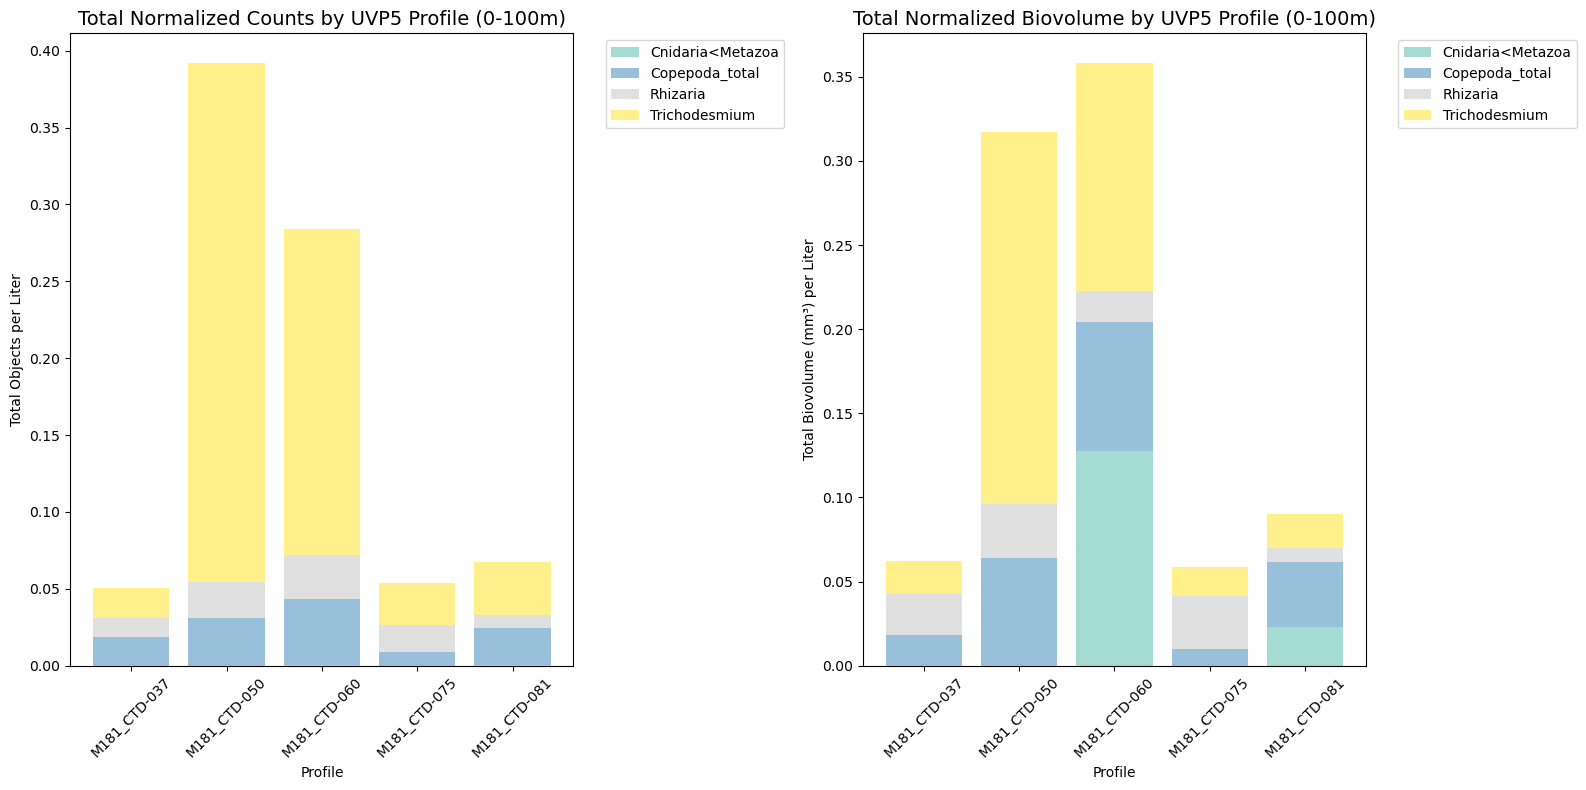


=== UVP5 PROFILE COMPARISON SUMMARY (0-100m) ===
        Profile  Sampled_Volume_L  Total_Objects_per_L  \
0  M181_CTD-037           4235.84             0.050285   
1  M181_CTD-050           4294.08             0.391702   
2  M181_CTD-060           4751.04             0.284359   
3  M181_CTD-075           4644.64             0.053825   
4  M181_CTD-081           4206.72             0.067749   

   Total_Biovolume_per_L_mm3  
0                   0.062047  
1                   0.316895  
2                   0.391107  
3                   0.058736  
4                   0.090119  

=== CATEGORY BREAKDOWN (Objects per L) ===
        Profile  Cnidaria<Metazoa_per_L  Copepoda_total_per_L  Rhizaria_per_L  \
0  M181_CTD-037                0.000000              0.018650        0.012276   
1  M181_CTD-050                0.000000              0.030973        0.023521   
2  M181_CTD-060                0.000421              0.043148        0.028204   
3  M181_CTD-075                0.000000        

In [8]:
# Create stacked plots for normalized counts and biovolume (0-100m) across UVP5 profiles
print("=== CREATING STACKED PLOTS FOR UVP5 PROFILES (0-100m) ===\n")

# Collect data from all normalized crop profile datasets
uvp5_profile_data = {}

for profile, crop_df in crop_profile_datasets.items():
    if 'sampled_volume_L' in crop_df.columns:  # Only use normalized datasets
        # Filter to 0-100m depth range
        filtered_df = crop_df.copy()
        depth_filter = []
        for depth_bin in filtered_df['depth_bin']:
            if pd.notna(depth_bin):
                start_depth = int(depth_bin.split('-')[0])
                depth_filter.append(start_depth <= 100)
            else:
                depth_filter.append(False)
        
        filtered_df = filtered_df[depth_filter]
        
        if len(filtered_df) > 0:
            # Calculate total normalized values across 0-100m
            total_volume = filtered_df['sampled_volume_L'].sum()
            
            if total_volume > 0:
                profile_data = {
                    'profile': profile,
                    'total_sampled_volume_L': total_volume,
                    'total_objects': filtered_df['total_objects'].sum(),
                    'total_biovolume_mm3': filtered_df['total_biovolume_mm3'].sum()
                }
                
                # Get count and biovolume columns for categories
                count_cols = [col for col in filtered_df.columns if col.startswith('count_') and not col.startswith('count_per_L')]
                biovolume_cols = [col for col in filtered_df.columns if col.startswith('biovolume_') and col.endswith('_mm3') and not col.startswith('biovolume_per_L')]
                
                # Sum counts and biovolume for each category across 0-100m
                for count_col in count_cols:
                    category = count_col.replace('count_', '')
                    total_count = filtered_df[count_col].sum()
                    profile_data[f'total_count_{category}'] = total_count
                    profile_data[f'total_count_per_L_{category}'] = total_count / total_volume
                
                for biovolume_col in biovolume_cols:
                    category = biovolume_col.replace('biovolume_', '').replace('_mm3', '')
                    total_biovolume = filtered_df[biovolume_col].sum()
                    profile_data[f'total_biovolume_{category}_mm3'] = total_biovolume
                    profile_data[f'total_biovolume_per_L_{category}_mm3'] = total_biovolume / total_volume
                
                uvp5_profile_data[profile] = profile_data
                print(f"Processed {profile}: {len(filtered_df)} depth bins, {total_volume:.3f}L total volume")

print(f"\nCollected data for {len(uvp5_profile_data)} UVP5 profiles")

if len(uvp5_profile_data) > 0:
    # Get categories from the first profile
    first_profile_data = list(uvp5_profile_data.values())[0]
    categories = []
    for key in first_profile_data.keys():
        if key.startswith('total_count_per_L_'):
            categories.append(key.replace('total_count_per_L_', ''))
    
    print(f"Categories found: {categories}")
    
    # Sort profiles for consistent ordering
    profiles_sorted = sorted(uvp5_profile_data.keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Colors for categories
    colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
    color_map = dict(zip(categories, colors))
    
    # Plot 1: Total normalized counts per profile (0-100m)
    bottom_counts = np.zeros(len(profiles_sorted))
    for category in categories:
        values = []
        for profile in profiles_sorted:
            col_name = f'total_count_per_L_{category}'
            values.append(uvp5_profile_data[profile].get(col_name, 0))
        
        ax1.bar(profiles_sorted, values, bottom=bottom_counts, 
                label=category, color=color_map[category], alpha=0.8)
        bottom_counts += np.array(values)
    
    ax1.set_title('Total Normalized Counts by UVP5 Profile (0-100m)', fontsize=14)
    ax1.set_xlabel('Profile')
    ax1.set_ylabel('Total Objects per Liter')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Total normalized biovolume per profile (0-100m)
    bottom_biovolume = np.zeros(len(profiles_sorted))
    for category in categories:
        values = []
        for profile in profiles_sorted:
            col_name = f'total_biovolume_per_L_{category}_mm3'
            values.append(uvp5_profile_data[profile].get(col_name, 0))
        
        ax2.bar(profiles_sorted, values, bottom=bottom_biovolume,
                label=category, color=color_map[category], alpha=0.8)
        bottom_biovolume += np.array(values)
    
    ax2.set_title('Total Normalized Biovolume by UVP5 Profile (0-100m)', fontsize=14)
    ax2.set_xlabel('Profile')
    ax2.set_ylabel('Total Biovolume (mm³) per Liter')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Display summary table
    print(f"\n=== UVP5 PROFILE COMPARISON SUMMARY (0-100m) ===")
    summary_data = []
    for profile in profiles_sorted:
        data = uvp5_profile_data[profile]
        summary_data.append({
            'Profile': profile,
            'Sampled_Volume_L': data['total_sampled_volume_L'],
            'Total_Objects_per_L': data['total_objects'] / data['total_sampled_volume_L'],
            'Total_Biovolume_per_L_mm3': data['total_biovolume_mm3'] / data['total_sampled_volume_L']
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.round(6))
    
    # Category breakdown
    print(f"\n=== CATEGORY BREAKDOWN (Objects per L) ===")
    category_df = pd.DataFrame(profiles_sorted, columns=['Profile'])
    for category in categories:
        values = [uvp5_profile_data[profile].get(f'total_count_per_L_{category}', 0) for profile in profiles_sorted]
        category_df[f'{category}_per_L'] = values
    
    print(category_df.round(6))

else:
    print("No UVP5 profile data available for plotting")

In [9]:
# Analyze Copepoda_total group in 0-100m depth range for UVP5 data
print("=== COPEPODA_TOTAL ANALYSIS (0-100m) ===\n")

# Need to reload the original crop_df since the variable was overwritten in the loop
# Use the original uvp5_data that was loaded at the beginning
original_crop_df = pd.DataFrame(uvp5_data)

# Apply same transformations as in cell 2
original_crop_df['profile'] = original_crop_df['sample_id'].apply(lambda x: 
    (x[2:-3] + 'CTD-' + x[-3:]).upper() if len(x) >= 5 else x.upper()
)

# Combine categories
original_crop_df['object_annotation_category'] = original_crop_df['object_annotation_category'].replace(
    {'Calanoida': 'Copepoda_total', 'Copepoda<Maxillopoda': 'Copepoda_total', 'puff': 'Trichodesmium'}
)

# Filter for specific categories
categories_to_keep = ["Appendicularia", "Thaliacea", "Cnidaria<Metazoa", "Copepoda_total", "Rhizaria", "Trichodesmium"]
original_crop_df = original_crop_df[original_crop_df['object_annotation_category'].isin(categories_to_keep)]

# Add biovolume
original_crop_df['esd_micrometers'] = original_crop_df['object_esd'] * 92
original_crop_df['esd_mm'] = original_crop_df['esd_micrometers'] / 1000
original_crop_df['biovolume_mm3'] = (np.pi / 6) * (original_crop_df['esd_mm'] ** 3)

# Filter for Copepoda_total in 0-100m range across all UVP5 profiles
copepoda_filtered = original_crop_df[
    (original_crop_df['object_annotation_category'] == 'Copepoda_total') & 
    (original_crop_df['object_depth_min'] >= 0) & 
    (original_crop_df['object_depth_min'] <= 100)
]

print(f"Total Copepoda_total individuals (0-100m): {len(copepoda_filtered)}")
print(f"Profiles with Copepoda_total data: {sorted(copepoda_filtered['profile'].unique())}")

# Count Copepoda_total by profile
copepoda_by_profile = copepoda_filtered['profile'].value_counts().sort_index()
print(f"\nCopepoda_total counts by profile:")
print(copepoda_by_profile)

# Calculate sampled volume for 0-100m range for each profile using volume_M181_df
print(f"\n=== SAMPLED VOLUME CALCULATION (0-100m) ===")

total_sampled_volume = 0
profile_volumes = {}

# Get volume data from the normalized crop datasets
for profile, crop_dataset in crop_profile_datasets.items():
    if 'sampled_volume_L' in crop_dataset.columns:
        # Filter to 0-100m depth range
        filtered_volume = crop_dataset.copy()
        depth_filter = []
        for depth_bin in filtered_volume['depth_bin']:
            if pd.notna(depth_bin):
                start_depth = int(depth_bin.split('-')[0])
                depth_filter.append(start_depth <= 100)
            else:
                depth_filter.append(False)
        
        filtered_volume = filtered_volume[depth_filter]
        
        if len(filtered_volume) > 0:
            volume_L = filtered_volume['sampled_volume_L'].sum()
            profile_volumes[profile] = {
                'depth_bins': len(filtered_volume),
                'volume_L': volume_L
            }
            total_sampled_volume += volume_L
            
            print(f"{profile}: {len(filtered_volume)} depth bins, {volume_L:.3f} L")

print(f"\nTotal sampled volume (0-100m): {total_sampled_volume:.3f} L")

# Calculate Copepoda_total density (individuals per liter)
print(f"\n=== COPEPODA_TOTAL DENSITY ===")
total_copepoda = len(copepoda_filtered)
overall_density = total_copepoda / total_sampled_volume if total_sampled_volume > 0 else 0

print(f"Total Copepoda_total individuals: {total_copepoda}")
print(f"Total sampled volume: {total_sampled_volume:.3f} L")
print(f"Overall Copepoda_total density: {overall_density:.3f} individuals/L")

# Density by profile
print(f"\nCopepoda_total density by profile:")
for profile in sorted(copepoda_by_profile.index):
    count = copepoda_by_profile[profile]
    if profile in profile_volumes:
        volume = profile_volumes[profile]['volume_L']
        density = count / volume if volume > 0 else 0
        print(f"{profile}: {count} individuals / {volume:.3f} L = {density:.3f} ind/L")

# Total biovolume of Copepoda_total
total_copepoda_biovolume = copepoda_filtered['biovolume_mm3'].sum()
biovolume_density = total_copepoda_biovolume / total_sampled_volume if total_sampled_volume > 0 else 0

print(f"\n=== COPEPODA_TOTAL BIOVOLUME ===")
print(f"Total Copepoda_total biovolume: {total_copepoda_biovolume:.6f} mm³")
print(f"Biovolume density: {biovolume_density:.6f} mm³/L")

# Summary table
summary_data = []
for profile in sorted(profile_volumes.keys()):
    count = copepoda_by_profile.get(profile, 0)
    volume = profile_volumes[profile]['volume_L']
    biovolume = copepoda_filtered[copepoda_filtered['profile'] == profile]['biovolume_mm3'].sum()
    
    summary_data.append({
        'Profile': profile,
        'Copepoda_Count': count,
        'Sampled_Volume_L': volume,
        'Density_ind_per_L': count / volume if volume > 0 else 0,
        'Biovolume_mm3': biovolume,
        'Biovolume_per_L_mm3': biovolume / volume if volume > 0 else 0
    })

summary_df = pd.DataFrame(summary_data)
print(f"\n=== COPEPODA_TOTAL SUMMARY TABLE (0-100m) ===")
print(summary_df.round(6))

=== COPEPODA_TOTAL ANALYSIS (0-100m) ===

Total Copepoda_total individuals (0-100m): 554
Profiles with Copepoda_total data: ['M181_CTD-037', 'M181_CTD-050', 'M181_CTD-060', 'M181_CTD-075', 'M181_CTD-081']

Copepoda_total counts by profile:
profile
M181_CTD-037     79
M181_CTD-050    132
M181_CTD-060    204
M181_CTD-075     41
M181_CTD-081     98
Name: count, dtype: int64

=== SAMPLED VOLUME CALCULATION (0-100m) ===
M181_CTD-037: 21 depth bins, 4235.840 L
M181_CTD-050: 21 depth bins, 4294.080 L
M181_CTD-060: 21 depth bins, 4751.040 L
M181_CTD-075: 21 depth bins, 4644.640 L
M181_CTD-081: 21 depth bins, 4206.720 L

Total sampled volume (0-100m): 22132.320 L

=== COPEPODA_TOTAL DENSITY ===
Total Copepoda_total individuals: 554
Total sampled volume: 22132.320 L
Overall Copepoda_total density: 0.025 individuals/L

Copepoda_total density by profile:
M181_CTD-037: 79 individuals / 4235.840 L = 0.019 ind/L
M181_CTD-050: 132 individuals / 4294.080 L = 0.031 ind/L
M181_CTD-060: 204 individuals / 

In [10]:
# Create detailed table of every Copepoda_total individual (0-100m)
print("=== DETAILED COPEPODA_TOTAL INDIVIDUAL TABLE (0-100m) ===\n")

# Create table with requested columns
copepoda_details = copepoda_filtered[[
    'object_id',
    'object_area',
    'object_esd',
    'biovolume_mm3',
    'profile',
    'object_depth_min'
]].copy()

# Rename columns for clarity
copepoda_details = copepoda_details.rename(columns={
    'object_id': 'Object_ID',
    'object_area': 'Pixel_Area',
    'object_esd': 'ESD_pixels',
    'biovolume_mm3': 'Biovolume_mm3',
    'profile': 'Profile',
    'object_depth_min': 'Depth_m'
})

# Sort by profile and depth
copepoda_details = copepoda_details.sort_values(['Profile', 'Depth_m'])

print(f"Total Copepoda_total individuals: {len(copepoda_details)}")
print(f"\nFirst 20 individuals:")
print(copepoda_details.head(20))

print(f"\nLast 20 individuals:")
print(copepoda_details.tail(20))

# Display summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(copepoda_details[['Pixel_Area', 'ESD_pixels', 'Biovolume_mm3', 'Depth_m']].describe())

# Count by profile
print(f"\n=== COUNT BY PROFILE ===")
print(copepoda_details['Profile'].value_counts().sort_index())

# Save to CSV
filename = "Copepoda_total_individuals_0-100m.csv"
copepoda_details.to_csv(filename, index=False)
print(f"\n=== TABLE SAVED ===")
print(f"Saved detailed table to: {filename}")
print(f"Total rows: {len(copepoda_details)}")
print(f"Columns: {copepoda_details.columns.tolist()}")

=== DETAILED COPEPODA_TOTAL INDIVIDUAL TABLE (0-100m) ===

Total Copepoda_total individuals: 554

First 20 individuals:
           Object_ID  Pixel_Area  ESD_pixels  Biovolume_mm3       Profile  \
1409    c_m181_037_2       208.0   16.273716       1.757204  M181_CTD-037   
72      c_m181_037_5       215.0   16.545286       1.846652  M181_CTD-037   
96      c_m181_037_8       204.0   16.116478       1.706760  M181_CTD-037   
61     c_m181_037_46       181.0   15.180789       1.426413  M181_CTD-037   
62     c_m181_037_59       159.0   14.228320       1.174419  M181_CTD-037   
73     c_m181_037_67       167.0   14.581872       1.264160  M181_CTD-037   
1660   c_m181_037_70        98.0   11.170384       0.568285  M181_CTD-037   
182    c_m181_037_72       146.0   13.634257       1.033372  M181_CTD-037   
41     c_m181_037_78       176.0   14.969641       1.367717  M181_CTD-037   
63     c_m181_037_79       207.0   16.234549       1.744548  M181_CTD-037   
169    c_m181_037_80       249.0 

=== CREATING BIOVOLUME COMPOSITION PLOT FOR UVP5 PROFILES (0-100m) ===

Categories found: ['Cnidaria<Metazoa', 'Copepoda_total', 'Rhizaria', 'Trichodesmium']


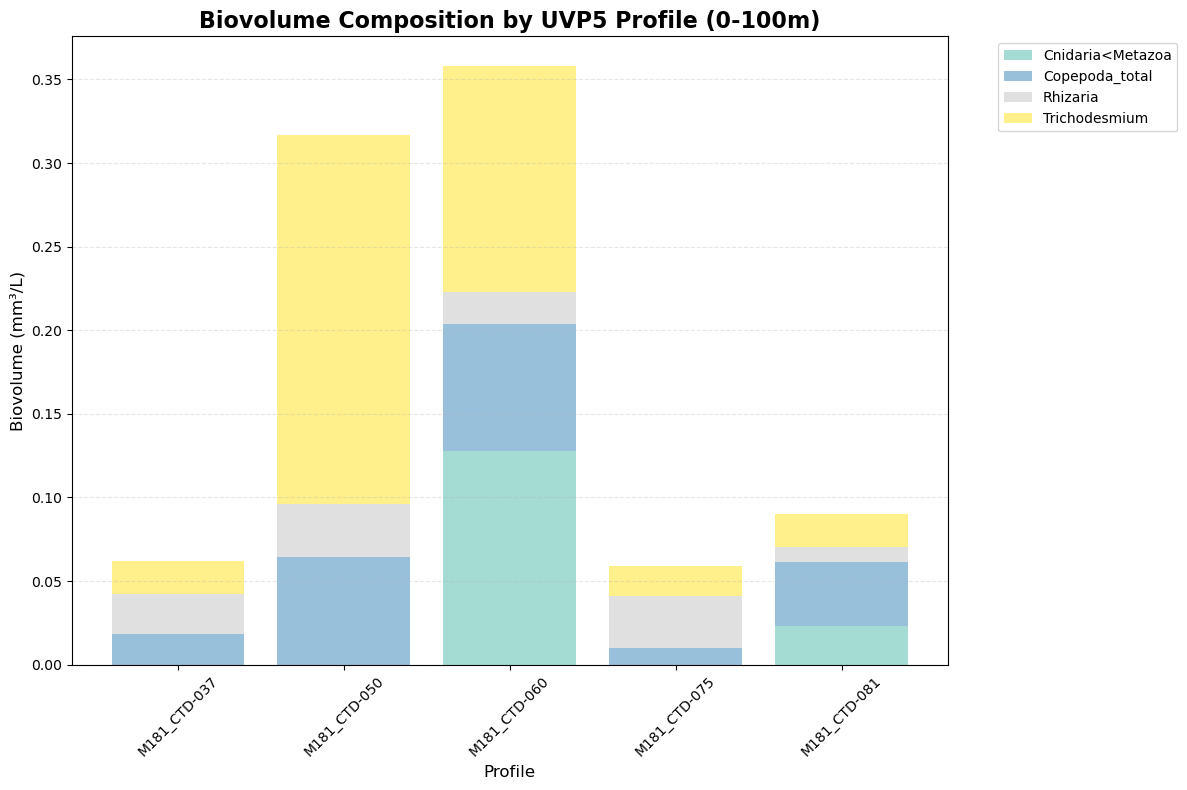


=== BIOVOLUME COMPOSITION BY CATEGORY (mm³/L, 0-100m) ===
        Profile  Cnidaria<Metazoa_mm3/L  Copepoda_total_mm3/L  Rhizaria_mm3/L  \
0  M181_CTD-037                0.000000              0.018082        0.024306   
1  M181_CTD-050                0.000000              0.064160        0.031793   
2  M181_CTD-060                0.127752              0.076277        0.018724   
3  M181_CTD-075                0.000000              0.010009        0.031157   
4  M181_CTD-081                0.023083              0.038623        0.008434   

   Trichodesmium_mm3/L  Total_mm3/L  
0             0.019658     0.062047  
1             0.220943     0.316895  
2             0.135142     0.357895  
3             0.017569     0.058736  
4             0.019980     0.090119  

=== PERCENTAGE CONTRIBUTION BY CATEGORY (0-100m) ===
        Profile  Cnidaria<Metazoa_%  Copepoda_total_%  Rhizaria_%  \
0  M181_CTD-037                0.00             29.14       39.17   
1  M181_CTD-050                0.0

In [11]:
# Create stacked plot for normalized biovolume composition (0-100m) across UVP5 profiles
print("=== CREATING BIOVOLUME COMPOSITION PLOT FOR UVP5 PROFILES (0-100m) ===\n")

if len(uvp5_profile_data) > 0:
    # Get categories from the first profile
    first_profile_data = list(uvp5_profile_data.values())[0]
    categories = []
    for key in first_profile_data.keys():
        if key.startswith('total_biovolume_per_L_') and key.endswith('_mm3'):
            categories.append(key.replace('total_biovolume_per_L_', '').replace('_mm3', ''))
    
    print(f"Categories found: {categories}")
    
    # Sort profiles for consistent ordering
    profiles_sorted = sorted(uvp5_profile_data.keys())
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Colors for categories
    colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
    color_map = dict(zip(categories, colors))
    
    # Plot: Total normalized biovolume per profile (0-100m)
    bottom_biovolume = np.zeros(len(profiles_sorted))
    for category in categories:
        values = []
        for profile in profiles_sorted:
            col_name = f'total_biovolume_per_L_{category}_mm3'
            values.append(uvp5_profile_data[profile].get(col_name, 0))
        
        ax.bar(profiles_sorted, values, bottom=bottom_biovolume,
                label=category, color=color_map[category], alpha=0.8)
        bottom_biovolume += np.array(values)
    
    ax.set_title('Biovolume Composition by UVP5 Profile (0-100m)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Profile', fontsize=12)
    ax.set_ylabel('Biovolume (mm³/L)', fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Display biovolume composition table
    print(f"\n=== BIOVOLUME COMPOSITION BY CATEGORY (mm³/L, 0-100m) ===")
    biovolume_comp_df = pd.DataFrame(profiles_sorted, columns=['Profile'])
    for category in categories:
        values = [uvp5_profile_data[profile].get(f'total_biovolume_per_L_{category}_mm3', 0) for profile in profiles_sorted]
        biovolume_comp_df[f'{category}_mm3/L'] = values
    
    # Add total column
    biovolume_comp_df['Total_mm3/L'] = biovolume_comp_df[[col for col in biovolume_comp_df.columns if col != 'Profile']].sum(axis=1)
    
    print(biovolume_comp_df.round(6))
    
    # Calculate percentage contribution of each category
    print(f"\n=== PERCENTAGE CONTRIBUTION BY CATEGORY (0-100m) ===")
    percentage_df = pd.DataFrame(profiles_sorted, columns=['Profile'])
    for category in categories:
        percentages = []
        for profile in profiles_sorted:
            biovolume = uvp5_profile_data[profile].get(f'total_biovolume_per_L_{category}_mm3', 0)
            total = uvp5_profile_data[profile]['total_biovolume_mm3'] / uvp5_profile_data[profile]['total_sampled_volume_L']
            percentage = (biovolume / total * 100) if total > 0 else 0
            percentages.append(percentage)
        percentage_df[f'{category}_%'] = percentages
    
    print(percentage_df.round(2))

else:
    print("No UVP5 profile data available for plotting")